In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

data = pd.read_csv(r"C:\Users\P R O B O O K\Downloads\data_jobs.csv")
df = data.copy()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df['job_title_short'] == 'Data Analyst']

In [12]:
df_explode = df.explode('job_skills')

skill_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'), 
    median_salary = ('salary_year_avg', 'median')
)

skill_stats= skill_stats.sort_values(by= 'skill_count', ascending=False).head(10)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


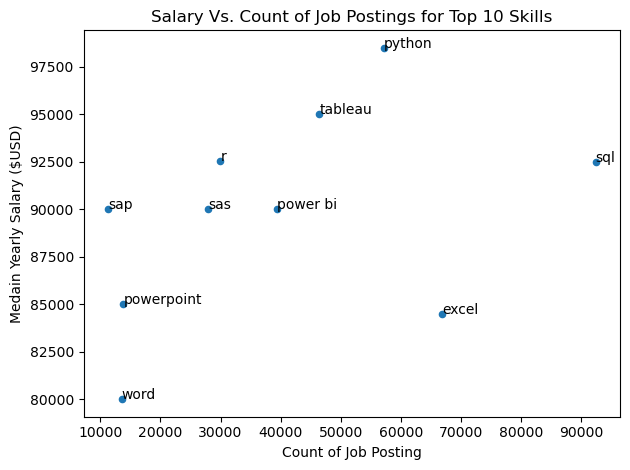

In [13]:
skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
plt.xlabel('Count of Job Posting')
plt.ylabel('Medain Yearly Salary ($USD)')
plt.title('Salary Vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show()